In [168]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

## Problem 1

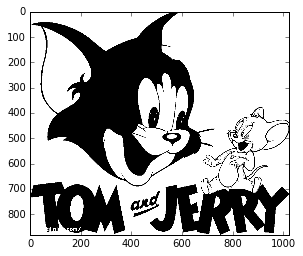

In [169]:
import skimage
from skimage import io

img = io.imread('hw6/TomJerry.jpg', as_grey=True)
img = (img > 0.5).astype('float32')
_ = plt.imshow(img, cmap='Greys_r')

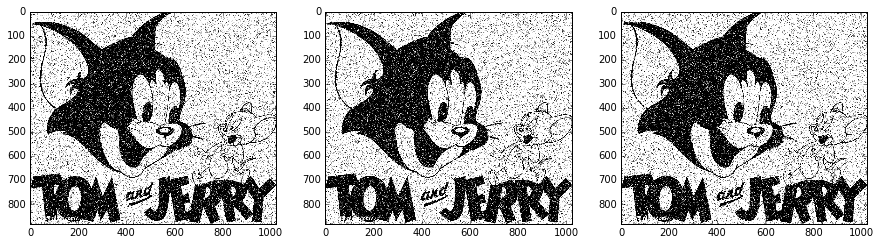

In [170]:
img_rep = img[:, :, np.newaxis].repeat(3, axis=2)
n = img_rep.size
noise = stats.bernoulli.rvs(p=0.1, size=n).reshape(img_rep.shape)
img_rep_recv = np.logical_xor(img_rep, noise).astype('float32')
fig = plt.figure(figsize=(15, 15))
for i in xrange(3):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(img_rep_recv[:, :, i], cmap='Greys_r')

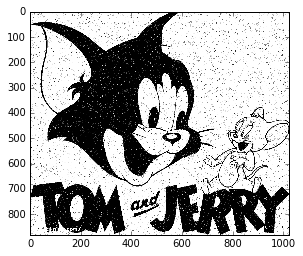

In [171]:
img_recv = img_rep_recv.sum(axis=2) > 3./2
img_recv = img_recv.astype('float32')
_ = plt.imshow(img_recv, cmap='Greys_r')

## Problem 2

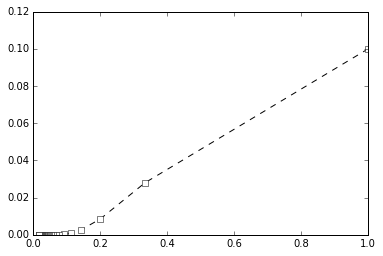

In [172]:
from scipy.misc import comb

def perror(N, f):
    return np.sum([comb(N, n) * f**n * (1. - f)**(N - n)
                   for n in xrange((N+1)/2, N+1)])
reps = np.arange(1, 62, 2)
rates = 1. / reps
_ = plt.plot(rates, map(lambda x: perror(x, 0.1), reps), 'ks--', markerfacecolor='w')

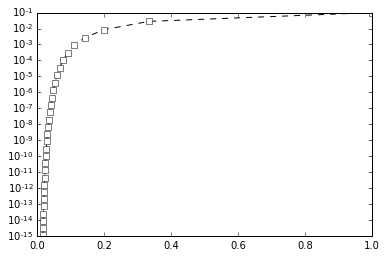

In [173]:
_ = plt.plot(rates, map(lambda x: perror(x, 0.1), reps), 'ks--', markerfacecolor='w')
plt.yscale('log')

## Problem 3

(225792, 3)
(225792, 7)


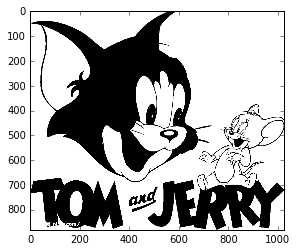

In [174]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 2, 1)
_ = ax1.imshow(img, cmap='Greys_r')
img_hamm = img.reshape((-1, 4))
P = np.array([[1, 1, 1, 0],
              [0, 1, 1, 1],
              [1, 0, 1, 1]]).T
hamm = img_hamm.dot(P) % 2
print hamm.shape
img_hamm = np.hstack([img_hamm, hamm])
print img_hamm.shape
# ax2 = fig.add_subplot(1, 2, 2)
# _ = ax2.imshow(hamm.reshape((882, -1)), cmap='Greys_r')

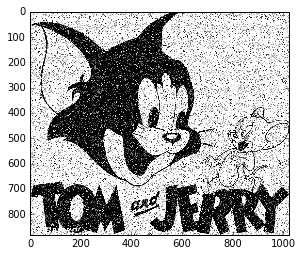

In [175]:
n = img_hamm.size
noise = stats.bernoulli.rvs(p=0.1, size=n).reshape(img_hamm.shape)
img_hamm_recv = np.logical_xor(img_hamm, noise).astype('float32')
_ = plt.imshow(img_hamm_recv[:, :4].reshape(img.shape), cmap='Greys_r')

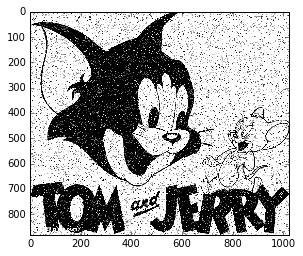

In [176]:
H = np.vstack([P, np.eye(3)])
z = img_hamm_recv.dot(H) % 2
z = z.astype('int')
check = np.array([7, 6, 5, 3, 4, 0, 1, 2])
index = z[:, 0]*4 + z[:, 1]*2 + z[:, 2]
error_bits = check[index]
m = img_hamm_recv.shape[0]
img_hamm_recv = np.hstack([img_hamm_recv, np.zeros((m, 1))]).astype('int')
img_hamm_recv[xrange(m), error_bits] ^= 1
img_recv = img_hamm_recv[:, :4].reshape(img.shape)
_ = plt.imshow(img_recv, cmap='Greys_r')